In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Statistics for combined data

### Read data

In [17]:
df = pd.read_parquet('IDS2017/Final/Combined.parquet')

df.reset_index(drop=True, inplace=True)
print("Shape of combined DataFrame:", df.shape)
df.columns

Shape of combined DataFrame: (1336224, 11)


Index(['Label', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Average Packet Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes'],
      dtype='object')

### Bar plot of every attack type

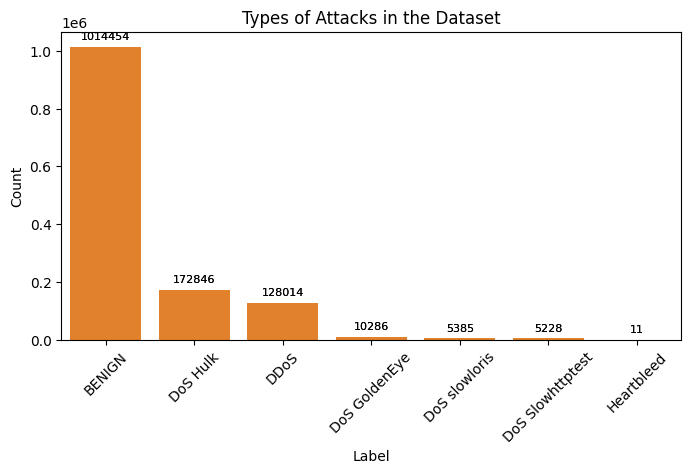

Label
BENIGN              1014454
DoS Hulk             172846
DDoS                 128014
DoS GoldenEye         10286
DoS slowloris          5385
DoS Slowhttptest       5228
Heartbleed               11
Name: count, dtype: int64
Benign: 1014454
Malicious: 321770


In [18]:
label_counts = df['Label'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.countplot(x='Label', data=df, order=label_counts.index)
ax = sns.countplot(x='Label', data=df, order=label_counts.index)

plt.title('Types of Attacks in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'baseline', 
        fontsize = 8, 
        color = 'black', 
        xytext = (0, 5), 
        textcoords = 'offset points'
    )

plt.show()
print(label_counts)

print('Benign:', label_counts.iloc[0])
print('Malicious:', label_counts.iloc[1:].sum())

### Heatmap for columns in dataset

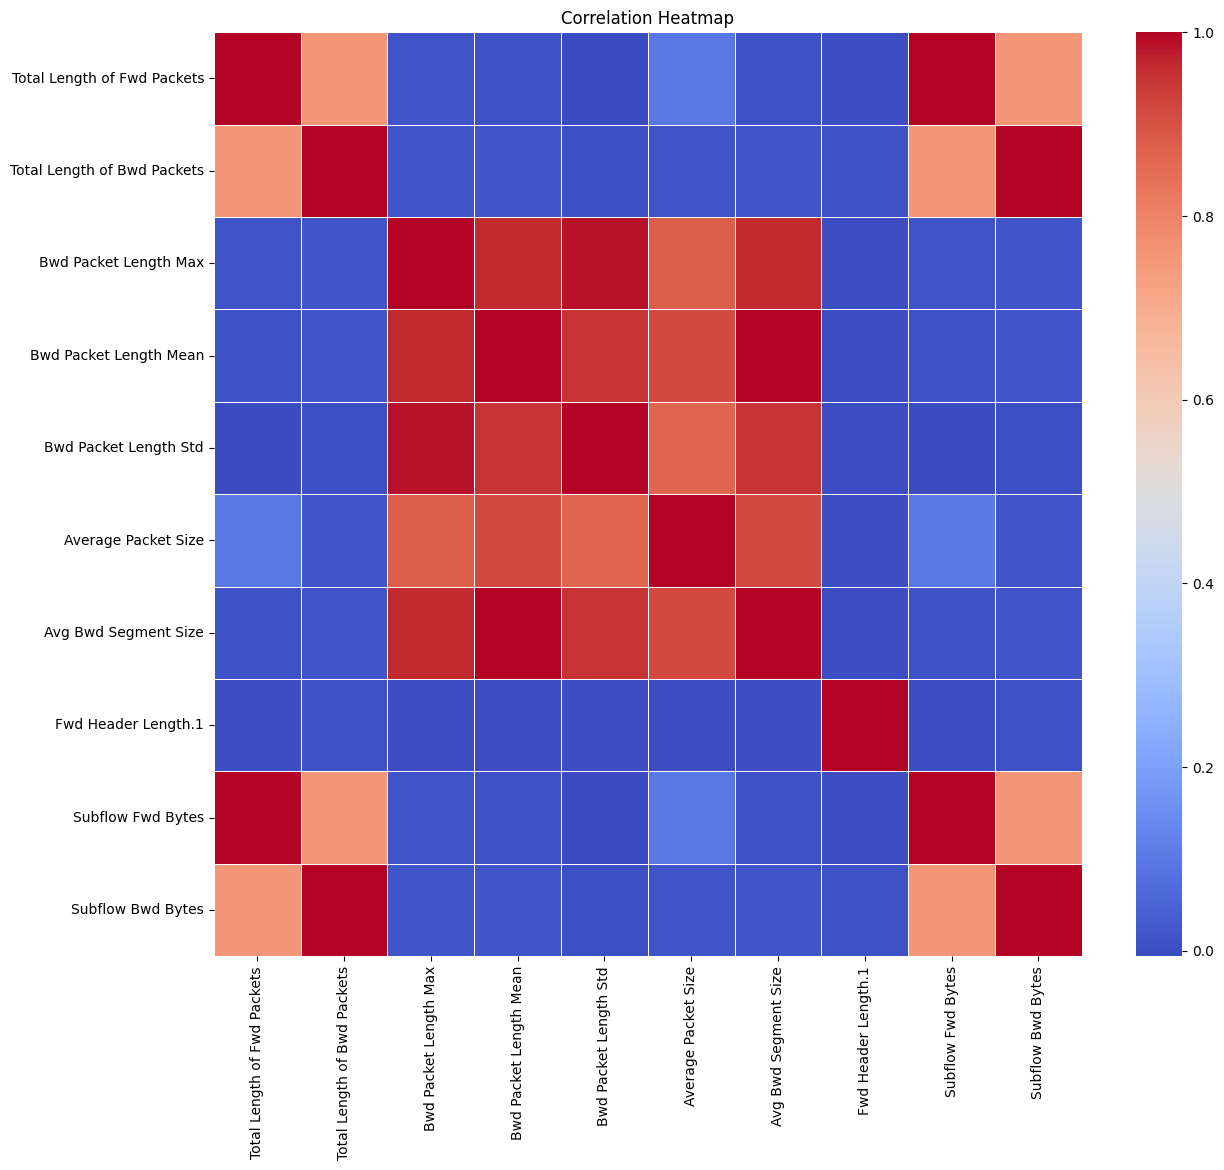

In [19]:
X = df.drop('Label', axis=1)
plt.figure(figsize=(14, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Barplots for mean values for every atack type

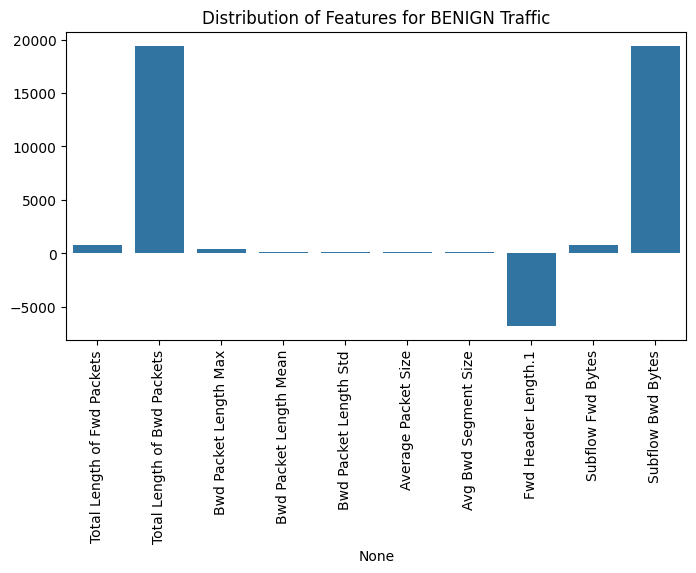

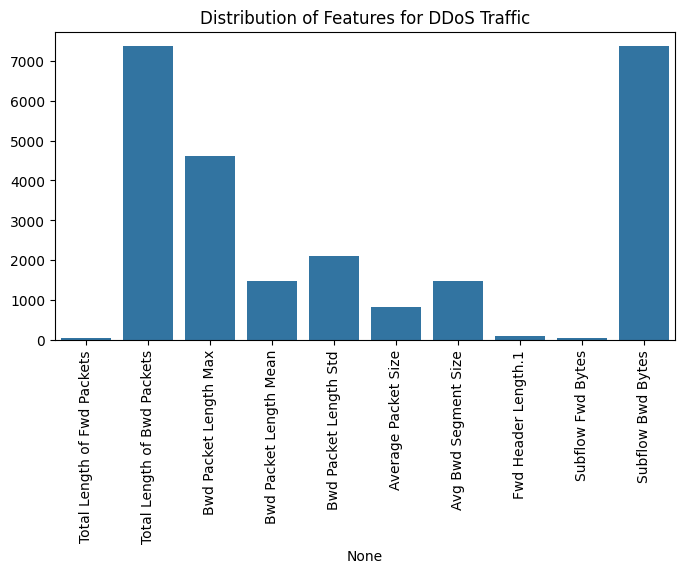

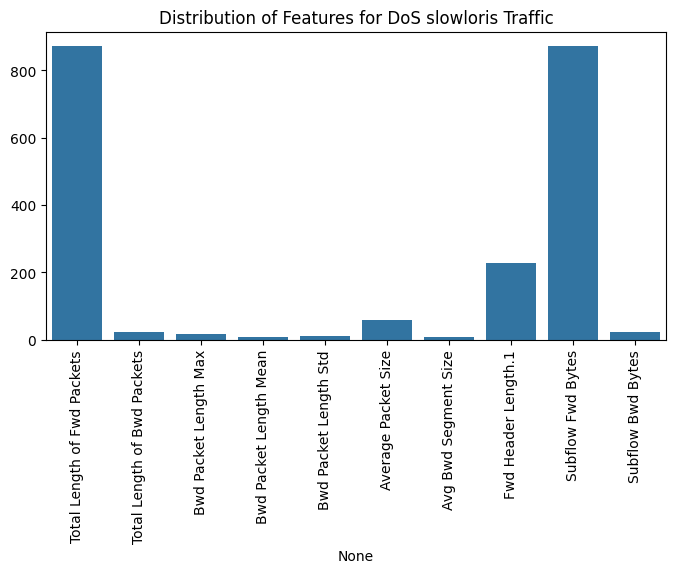

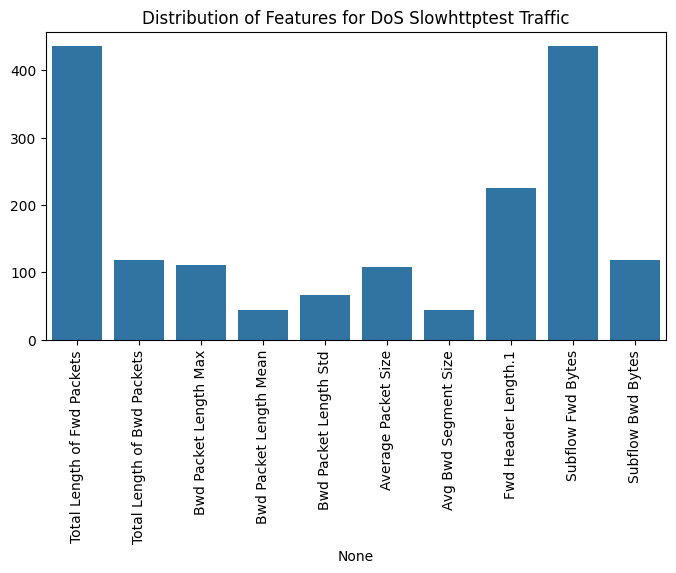

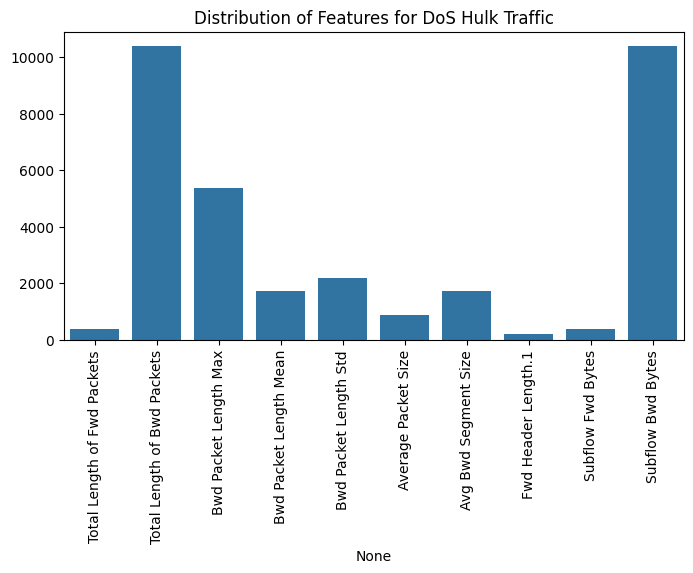

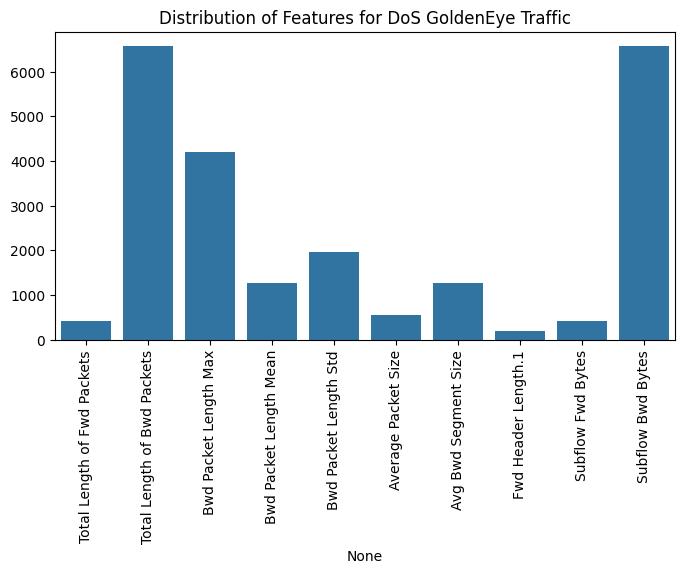

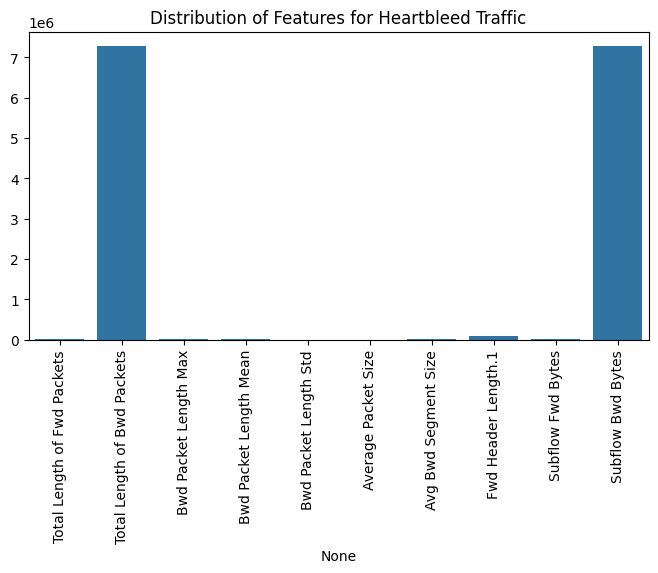

In [20]:
# Przykładowe rozkłady dla różnych ataków
Attack_types = df['Label'].unique()
for attack in Attack_types:
    attack_data = df[df['Label'] == attack]
    attack_data = attack_data.drop(columns=['Label'])
    attack_data = attack_data.mean(numeric_only=True)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=attack_data.index, y=attack_data.values)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of Features for {attack} Traffic')
    plt.show()